## Observations and Insights 

In [ ]:
#Summary of the stuy results
#Observations in this study
# Between the four most promising treatment regimens: (Capomulin, Ramicane, Infubinol, and Ceftamin),
# Ramicane was one with a lowest final tumor volume results .
# Infubinol was one with the highest final tumor volume results.
# I notice that the mouse treated with capomulin decrease the tumor value vs the time point.
# I notice that the mouse treated with capomulin had a consistent weight vs tumor volume average.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicateMouse = study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]).any()
#duplicateMouse

duplicates = study_data_complete["Mouse ID"].value_counts()
duplicates = pd.DataFrame(duplicates)
duplicates = duplicates.rename(columns={"Mouse ID" : "Counts of Mouse ID"})
duplicates.head()

Counts of Mouse ID
g989                  13
j984                  10
q787                  10
c758                  10
z581                  10

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# set the index to the mouse ID
index_study_data = study_data_complete.set_index("Mouse ID")
index_study_data.head()
# check the mouse data for ID
g989 = index_study_data.loc["g989",:]
g989

Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
Mouse ID                                                                 
g989              0           45.000000                 0     Propriva   
g989              0           45.000000                 0     Propriva   
g989              5           48.786801                 0     Propriva   
g989              5           47.570392                 0     Propriva   
g989             10           51.745156                 0     Propriva   
g989             10           49.880528                 0     Propriva   
g989             15           51.325852                 1     Propriva   
g989             15           53.442020                 0     Propriva   
g989             20           55.326122                 1     Propriva   
g989             20           54.657650                 1     Propriva   
g989             25           56.045564                 1     Propriva   
g989             30           59.082294                 1     Propriva   
g989             35           62.570880                 2     Propriva   

             Sex  Age_months  Weight (g)  
Mouse ID                                  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26  
g989      Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data = study_data_complete.reset_index()
clean_study_data = study_data_complete.drop_duplicates("Mouse ID")
clean_study_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
len(study_data_complete["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# series variable to hold Tumor Volume Data grouped by Drug Regimen
tumor_volume = study_data_complete.groupby(['Drug Regimen'])["Tumor Volume (mm3)"]

# variable to hold the Mean Tumor Volume Data Grouped by Drug Regimen
mean_tumor_volume = tumor_volume.mean()

# variable to hold median Tumor Volume Data Grouped by Drug Regimen
median_tumor_volume = tumor_volume.median()

# variable to hold the Tumor Volume Variance Data Grouped by Drug Regimen
var_tumor_volume = tumor_volume.var()

# variable to hold the Tumor Volume Standard Deviation Data Grouped by Drug Regimen
std_tumor_volume = tumor_volume.std()

# variable to hold the Tumor Volume SEM Data Grouped by Drug Regimen
sem_tumor_volume = tumor_volume.sem()

# Convert to DataFrame
drug_tumor_df = pd.DataFrame({"Mean Tumor Volume": mean_tumor_volume,
                             "Median Tumor Volume": median_tumor_volume,
                             "Tumor Volume Variance": var_tumor_volume,
                             "Tumor Volume Std. Dev": std_tumor_volume,
                             "Tumor volume SEM": sem_tumor_volume})
# Preview DataFrame
drug_tumor_df

Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev  Tumor volume SEM  
Drug Regimen                                           
Capomulin                  4.994774          0.329346  
Ceftamin                   6.268188          0.469821  
Infubinol                  6.567243          0.492236  
Ketapril                   8.279709          0.603860  
Naftisol                   8.134708          0.596466  
Placebo                    7.821003          0.581331  
Propriva                   6.507770          0.512884  
Ramicane                   4.846308          0.320955  
Stelasyn                   7.710419          0.573111  
Zoniferol                  6.966589          0.516398

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_tumor_df = study_data_complete.groupby("Drug Regimen").agg(Mean_Tumor_Volume = ("Tumor Volume (mm3)", np.mean),
Median_Tumor_Volume = ("Tumor Volume (mm3)", np.median),
Variance_Tumor_Volume = ("Tumor Volume (mm3)", np.var),
Stdev_Tumor_Volume = ("Tumor Volume (mm3)", np.std),
SEM_Tumor_Volume = ("Tumor Volume (mm3)", st.sem))
    
drug_tumor_df

Mean_Tumor_Volume  Median_Tumor_Volume  Variance_Tumor_Volume  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.322552            50.854632              42.351070   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Stdev_Tumor_Volume  SEM_Tumor_Volume  
Drug Regimen                                        
Capomulin               4.994774          0.329346  
Ceftamin                6.268188          0.469821  
Infubinol               6.567243          0.492236  
Ketapril                8.279709          0.603860  
Naftisol                8.134708          0.596466  
Placebo                 7.821003          0.581331  
Propriva                6.507770          0.512884  
Ramicane                4.846308          0.320955  
Stelasyn                7.710419          0.573111  
Zoniferol               6.966589          0.516398

## Bar and Pie Charts

In [9]:
study_data_complete.count()

Mouse ID              1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
dtype: int64

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
# list of unique drug regimens
# drug regimen as x-axis values for plotting
# drop all duplicate mice
regimen_study_data = study_data_complete.reset_index()
regimen_study_data = study_data_complete.drop_duplicates("Mouse ID")
regimen_study_data.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [11]:
# get mice counts per drug
drug_regimen = clean_study_data["Drug Regimen"].value_counts()
drug_regimen_df = pd.DataFrame(drug_regimen)
drug_regimen_df

Drug Regimen
Propriva             25
Placebo              25
Ramicane             25
Infubinol            25
Capomulin            25
Ketapril             25
Naftisol             25
Ceftamin             25
Zoniferol            25
Stelasyn             24

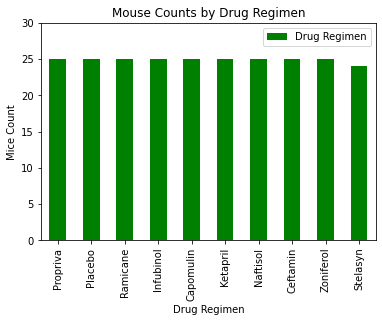

In [12]:
# plot the mouse counts for each drug using pandas
drug_regimen_df.plot(kind="bar", figsize=(6,4), ylim=(0,30), color="green")

# I'm setting a title and labels for the chart
plt.title("Mouse Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

# Cleaning the bar chart 
plt.show()

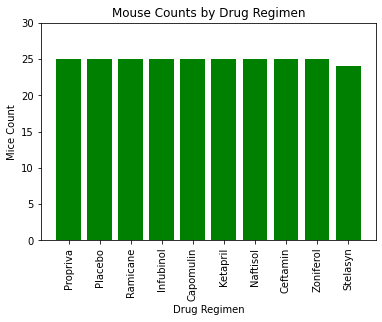

In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# plot the bar graph of mice count per drug regimen
x_axis = clean_study_data["Drug Regimen"].value_counts().keys()
y_axis = drug_regimen

# Im generating the bar chart
plt.bar(x_axis, y_axis, color="green", align="center")

# I'm setting a title, labels and ticks rotation for the chart
plt.title("Mouse Counts by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")
plt.xticks(rotation=90)
plt.ylim(0, max(y_axis)+5)

# Cleaning the bar chart
plt.show()

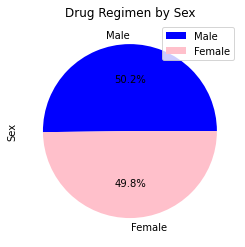

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# I'm generating a data frame to show the distribution of female versus male mice
distribution = clean_study_data["Sex"].value_counts()
distribution_df = pd.DataFrame(distribution)
color = ["blue", "pink"]
#distribution_df

# plot the mouse counts for each drug using pandas
distribution_df.plot(kind="pie", figsize=(4,4), autopct="%1.1f%%", subplots=True, colors=color)

# I'm setting a title for the chart
plt.title("Drug Regimen by Sex")

# Cleaning the bar chart 
plt.show()

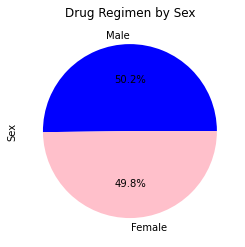

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# im generating the labels for the sections of the pie chart
labels = clean_study_data["Sex"].value_counts().keys()
sex = clean_study_data["Sex"].value_counts()
colors = ["blue", "pink"]

#Im generating the pie chart with pyplot
plt.pie(sex, labels=labels, colors=colors, autopct="%1.1f%%")

# I'm setting a title for the chart
plt.title("Drug Regimen by Sex")
plt.ylabel("Sex")

# Cleaning the bar chart 
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# set drug regimen as index and drop associated regimens while only keeping Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_index = study_data_complete.drop_duplicates("Mouse ID")
regimen_index = study_data_complete.set_index("Drug Regimen")
#regimen_index

# Im keeping Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_clean = regimen_index.loc[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]]
#regimen_clean

# isolated view of just capomulin for later use
capomulin = regimen_index.loc["Capomulin"]
#capomulin

# Reset index so drug regimen column persists after inner merge
regimen_index_2 = regimen_clean.reset_index()
#regimen_index_2

# get mouse count per drug
drug_regimen = regimen_index_2["Drug Regimen"].value_counts()
drug_regimen = regimen_index_2.groupby("Drug Regimen")["Mouse ID"].unique()
#drug_regimen

# Start by getting the last (greatest) timepoint for each mouse
timepoint_data = regimen_index_2.groupby("Mouse ID")["Timepoint"].max()
timepoint_data

timepoint_data

Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
        ..
y769    45
y793    45
y865    45
z578    45
z581    45
Name: Timepoint, Length: 100, dtype: int64

In [17]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = pd.merge(regimen_index_2, timepoint_data, on=["Mouse ID", "Timepoint"])
merge_df = merge_df.set_index("Mouse ID")
merge_df = merge_df.sort_values("Timepoint")
merge_df
# show all rows of data
merge_df.head(249)

Drug Regimen  Timepoint  Tumor Volume (mm3)  Metastatic Sites  \
Mouse ID                                                                 
b447         Ceftamin          0           45.000000                 0   
t573         Ceftamin          0           45.000000                 0   
u153         Ceftamin          0           45.000000                 0   
x226         Ceftamin          0           45.000000                 0   
h531         Ceftamin          5           47.784682                 0   
...               ...        ...                 ...               ...   
q597         Ramicane         45           45.220869                 2   
a411         Ramicane         45           38.407618                 1   
n364         Ramicane         45           31.095335                 1   
k403         Ramicane         45           22.050126                 1   
p438         Ceftamin         45           61.433892                 1   

             Sex  Age_months  Weight (g)  
Mouse ID                                  
b447        Male           2          30  
t573      Female          15          27  
u153      Female          11          25  
x226        Male          23          28  
h531        Male           5          27  
...          ...         ...         ...  
q597        Male          20          25  
a411        Male           3          22  
n364        Male           4          17  
k403        Male          21          16  
p438      Female          11          26  

[100 rows x 7 columns]

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
#set drugs to be analyzed, colors for the plots, and markers
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = regimen_clean['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    
# Locate the rows which contain mice on each drug and get the tumor volumes
mice_drug_tumor = merge_df.iloc[:, [0, 2]]
mice_drug_tumor.head()

Drug Regimen  Tumor Volume (mm3)
Mouse ID                                 
b447         Ceftamin           45.000000
t573         Ceftamin           45.000000
u153         Ceftamin           45.000000
x226         Ceftamin           45.000000
h531         Ceftamin           47.784682

In [19]:
# Determine outliers using upper and lower bounds
# Determine outliers using upper and lower bounds
print(f"The lower quartile of Tumor is {lowerq}")
print(f"The upper quartile of Tumor is {upperq}")
print(f"The interquartile range of Tumor Volume is: {iqr}")
print(f"The median of Tumor Value is: {quartiles[0.5]}")
print(f"Values below {lower_bound} could be outliners.")
print(f"Values above {upper_bound} could be outliners.")

The lower quartile of Tumor is 40.2201707875
The upper quartile of Tumor is 50.356470630000004
The interquartile range of Tumor Volume is: 10.136299842500001
The median of Tumor Value is: 45.0
Values below 25.01572102375 could be outliners.
Values above 65.56092039375001 could be outliners.


In [20]:
# add subset 


# tumor volumes for each Drug Regimen
tumor_drug = regimen_index_2.groupby("Drug Regimen")['Tumor Volume (mm3)'].value_counts()
tumor_drug.head()

Drug Regimen  Tumor Volume (mm3)
Capomulin     45.000000             25
              23.343598              1
              25.472143              1
              28.167397              1
              28.328531              1
Name: Tumor Volume (mm3), dtype: int64

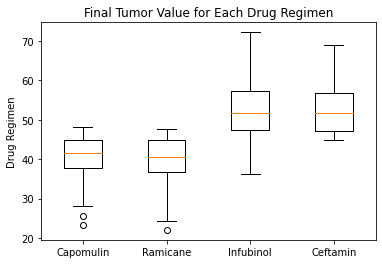

In [21]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for drug in treatment_list:
    final_tumor_vol = regimen_index_2.loc[regimen_index_2["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    tumor_vol_data.append(final_tumor_vol)
    
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Value for Each Drug Regimen')
ax1.set_ylabel('Drug Regimen')
ax1.boxplot(tumor_vol_data, labels=treatment_list)
plt.show()



## Line and Scatter Plots

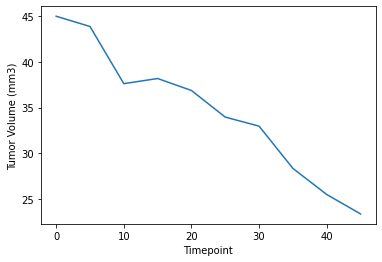

In [22]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#change index to mouse ID 
#remove other mouse IDs so only s185 shows
#set the x-axis equal to the Timepoint and y-axis to Tumor Volume
x_axis_capomulin = capomulin.loc[capomulin['Mouse ID'] == 's185', 'Timepoint']
y_axis_capomulin = capomulin.loc[capomulin['Mouse ID'] == 's185', 'Tumor Volume (mm3)']
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis_capomulin, y_axis_capomulin)
plt.show()

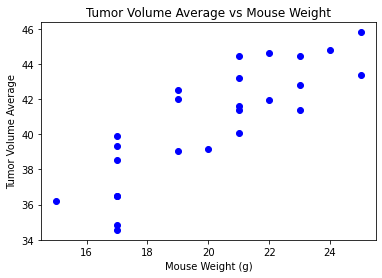

In [23]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# group by mouse ID to find average tumor volume
# establish x-axis value for the weight of the mice
# produce scatter plot of the data
avg_tumor_volume = []
weights = []

for weight in (capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()):
    weights.append(weight)
    
for volume in (capomulin.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()):
    avg_tumor_volume.append(volume)
    
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")
plt.title("Tumor Volume Average vs Mouse Weight")
plt.scatter(weights, avg_tumor_volume, marker="o", facecolors="blue", edgecolors="blue")
plt.show()

## Correlation and Regression

St. Pearson Correlation Coefficient is 0.84


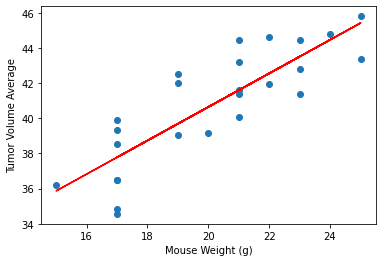

In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#establish x and y values and find St. Pearson Correlation Coefficient for Mouse Weight and Tumor Volume Avg
(slope, intercept, rvalue, pvalue, stderr) = linregress(weights, avg_tumor_volume)

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#print St. Pearson Correlation Coefficient
print(f"St. Pearson Correlation Coefficient is {round(rvalue, 2)}")

# establish linear regression values
regress_values = slope*(capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()) + intercept

# linear regression line 
regress_values = slope*(capomulin.groupby(["Mouse ID"])["Weight (g)"].mean()) + intercept

# scatter plot of the data
plt.scatter(weights,avg_tumor_volume)
plt.plot(weights,regress_values,"r-")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume Average")

plt.show()